In [119]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import hvplot.pandas

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")


In [120]:
#import scores and stadiums csv files as dataframe
scores_df=pd.read_csv('../project_one/Resources/spreadspoke_scores.csv')
stadium_df=pd.read_csv('../project_one/Resources/nfl_stadiums.csv', encoding="utf-8")

In [121]:
# Merge scores and stadiums datframes

# The two daraframes have different columns names containg stadium names. Rename one so they match for merging
scores_df.rename(columns = {'stadium':'stadium_name'}, inplace = True)

# Merge two dataframes left on stadium_name
data_df=pd.merge(scores_df, stadium_df, how='left', on='stadium_name' )


In [122]:
# Clean data

# Remove columns not being used for this project

# Define columns to be dropped
drop_list=['stadium_elevation', 
           'stadium_azimuthangle', 
           'stadium_weather_station_name',
           'stadium_weather_station',
           'stadium_weather_station_zipcode',
           'stadium_address',
           'stadium_close',
           'stadium_open',
           'over_under_line',
           'spread_favorite',
           'team_favorite_id',
            ]

# Drop the selected columns
data_df=data_df.drop(drop_list, axis='columns')

# Drop neutral site games, keep only home/away 
data_df=data_df.loc[data_df['stadium_neutral']==False]

# Drops NaNs in home and away scores
data_df.dropna(subset=['score_home'], inplace=True)
data_df.dropna(subset=['score_away'], inplace=True)



In [123]:
# Add a empty column home_result
data_df["home_result"]=''

In [124]:
# Move new column over to be beside the home and away scores
data_df=data_df.iloc[:,[0,1,2,3,4,5,6,7,21,8,9,10,11,12,13,14,15,16,17,18,19,20]]


In [125]:
# Fill column home_result to show if home team won (W), lost (L) or tied (T) 
# based on relationship between home score and away score

home=data_df['score_home']
away=data_df['score_away']

data_df['home_result']=np.where(home > away, 'Win', 
                        np.where(home < away, 'Loss','Tie'))

#data_df['home_result'] = data_df.apply(lambda x:'Win' if x['score_home'] > x['score_away'] else "Loss or Tie",axis=1)

# Check 
data_df.head()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,home_result,stadium_name,...,weather_wind_mph,weather_humidity,weather_detail,stadium_location,stadium_type,stadium_weather_type,stadium_capacity,stadium_surface,stadium_latitude,stadium_longitude
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,Loss,Orange Bowl,...,6.0,71.0,NaN,"Miami, FL",outdoor,warm,NaN,NaN,25.790500,-80.316300
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,Win,Rice Stadium,...,7.0,70.0,NaN,"Houston, TX",outdoor,warm,NaN,Grass,NaN,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,Win,Balboa Stadium,...,7.0,82.0,NaN,"San Diego, CA",outdoor,warm,NaN,Grass,NaN,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,Loss,Orange Bowl,...,11.0,78.0,NaN,"Miami, FL",outdoor,warm,NaN,NaN,25.790500,-80.316300
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,Win,Lambeau Field,...,8.0,62.0,NaN,"Green Bay, WI",outdoor,cold,"80,735",Grass,44.501389,-88.062222


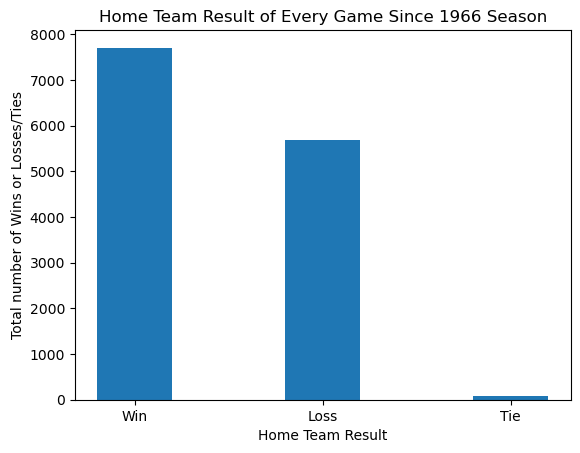

In [126]:
# Bar chart of total home wins and total losses/ties for entire dataset


# Make small dataframe with total numbers of Wins or Losses/Ties from main dataframe
summary=pd.DataFrame(data_df['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

# Plot bar graph
plt.bar(result, counts, width = 0.4)

plt.xlabel('Home Team Result')
plt.ylabel('Total number of Wins or Losses/Ties')
plt.title("Home Team Result of Every Game Since 1966 Season")

plt.show()



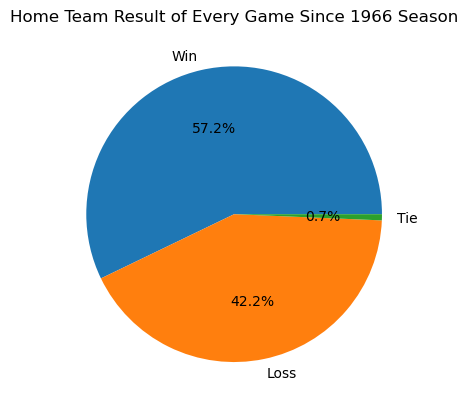

In [127]:
# Pie chart of total home wins and total losses/ties for entire dataset


plt.pie(counts, labels=result, autopct='%1.1f%%')


plt.title("Home Team Result of Every Game Since 1966 Season")

plt.show()

In [128]:
# Historical trend

# Count number of wins and losses overall

overall_win_count=data_df['home_result'].value_counts()['Win']
print(overall_win_count)
overall_loss_count=data_df['home_result'].value_counts()['Loss']
print(overall_loss_count)
overall_tie_count=data_df['home_result'].value_counts()['Tie']
print(overall_tie_count)

# This checks fine, 


7705
5687
90


<function matplotlib.pyplot.show(close=None, block=None)>

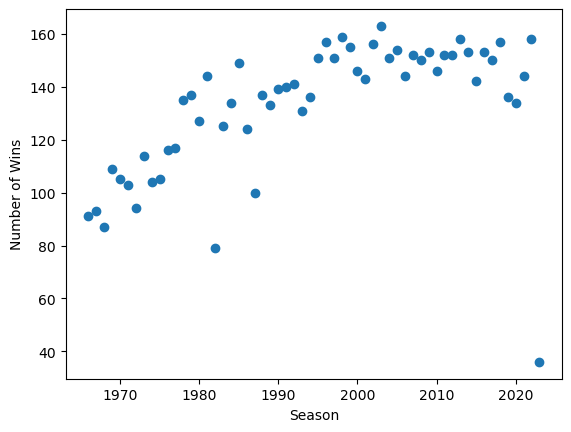

In [129]:
# Graph of wins vs year

# Get win, loss and tie counts when grouped by year
counts=pd.DataFrame(data_df.groupby(['schedule_season', 'home_result']).size())

# Filter out everything except Wins
win_data=data_df.loc[data_df['home_result']=='Win']

# Get win counts when grouped by year
win_counts=pd.DataFrame(win_data.groupby(['schedule_season']).size())


# Plot graph of wins vs year

x_axis=win_counts.index
y_axis=win_counts[0]

plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.scatter(x_axis, y_axis)
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

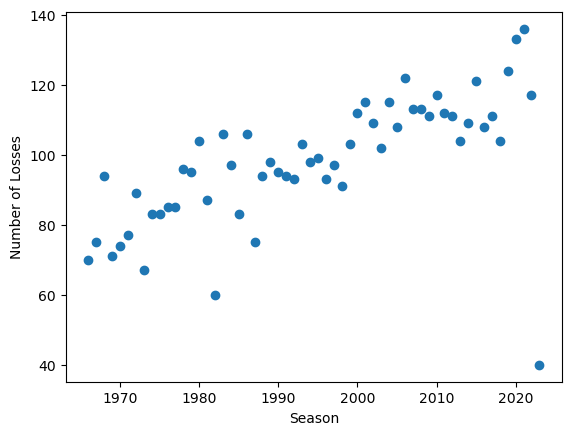

In [130]:
# Graph of losses vs year

# Filter out everything except Wins
loss_data=data_df.loc[data_df['home_result']=='Loss']

# Get win counts when grouped by year
loss_counts=pd.DataFrame(loss_data.groupby(['schedule_season']).size())


# Plot graph of wins vs year
x_axis=loss_counts.index
y_axis=loss_counts[0]

plt.xlabel('Season')
plt.ylabel('Number of Losses')
plt.scatter(x_axis, y_axis)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

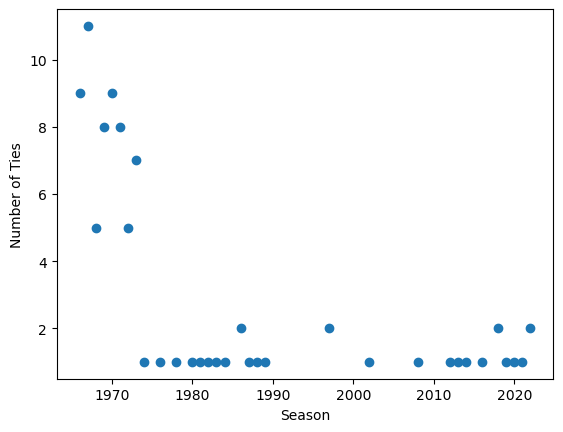

In [131]:
# Graph of ties vs year

# Filter out everything except Wins
tie_data=data_df.loc[data_df['home_result']=='Tie']

# Get win counts when grouped by year
tie_counts=pd.DataFrame(tie_data.groupby(['schedule_season']).size())


# Plot graph of wins vs year
x_axis=tie_counts.index
y_axis=tie_counts[0]

plt.xlabel('Season')
plt.ylabel('Number of Ties')
plt.scatter(x_axis, y_axis)
plt.show

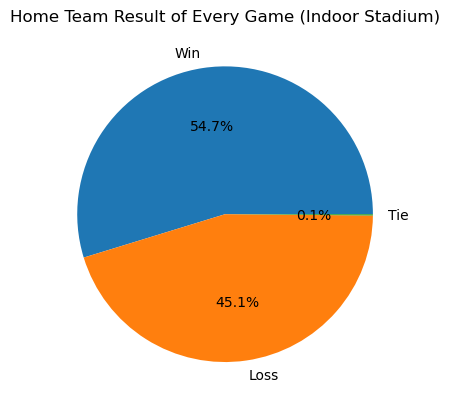

In [132]:
# Pie chart of total home wins and total losses/ties for indoor stadiums

# Filter entire dataset for indoor stadiums
indoor_data=data_df.loc[data_df['stadium_type']=='indoor']

# Make small dataframe with total numbers of Wins or Losses/Ties from main dataframe
summary=pd.DataFrame(indoor_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.pie(counts, labels=result, autopct='%1.1f%%')

plt.title("Home Team Result of Every Game (Indoor Stadium)")

plt.show()


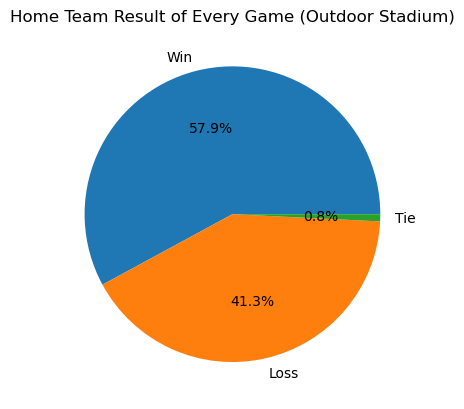

In [133]:
# Pie chart of total home wins and total losses/ties for outdoor stadiums

# Filter entire dataset for outdoor stadiums
outdoor_data=data_df.loc[data_df['stadium_type']=='outdoor']

# Make small dataframe with total numbers of Wins or Losses/Ties from above dataframe
summary=pd.DataFrame(outdoor_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.pie(counts, labels=result, autopct='%1.1f%%')

plt.title("Home Team Result of Every Game (Outdoor Stadium)")

plt.show()


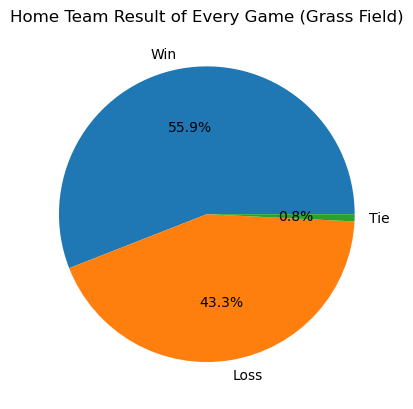

In [134]:
# Pie chart of total home wins and total losses/ties for grass field
# NaNs in stadium_surface column, lots of different names for brands of artifical turf!!!

# Filter entire dataset for grass surface
grass_data=data_df.loc[data_df['stadium_surface']=='Grass']

# Make small dataframe with total numbers of Wins or Losses/Ties from above dataframe
summary=pd.DataFrame(grass_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.pie(counts, labels=result, autopct='%1.1f%%')

plt.title("Home Team Result of Every Game (Grass Field)")

plt.show()


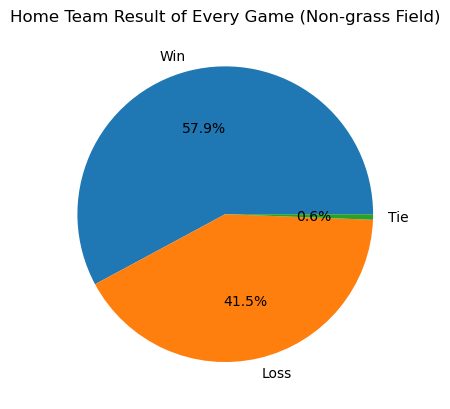

In [135]:
# Pie chart of total home wins and total losses/ties for non-grass field
# NaNs in stadium_surface column, lots of different names for brands of artifical turf!!!

# Filter entire dataset for non-grass surface
grass_data=data_df.loc[data_df['stadium_surface']!='Grass']

# Make small dataframe with total numbers of Wins or Losses/Ties from above dataframe
summary=pd.DataFrame(grass_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.pie(counts, labels=result, autopct='%1.1f%%')

plt.title("Home Team Result of Every Game (Non-grass Field)")

plt.show()

In [136]:
stadium_df.head()

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_zipcode,stadium_weather_type,stadium_capacity,stadium_surface,stadium_weather_station,stadium_weather_station_name,stadium_latitude,stadium_longitude,stadium_azimuthangle,stadium_elevation
0,Acrisure Stadium,"Pittsburgh, PA",2001.0,NaN,outdoor,"100 Art Rooney Ave, Pittsburgh, PA 15212",15212,cold,"65,500",Grass,USW00094823,"PITTSBURGH ASOS, PA US",40.484600,-80.214400,NaN,366.7
1,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,indoor,72000,FieldTurf,NaN,NaN,29.416944,-98.478889,0.0,NaN
2,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,indoor,65000,Grass,NaN,NaN,36.090750,-115.183722,0.0,NaN
3,Allianz Arena,"Munich, Germany",NaN,NaN,outdoor,NaN,NaN,moderate,"75,024",Grass,NaN,NaN,NaN,NaN,NaN,NaN
4,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,warm,NaN,NaN,NaN,NaN,30.323889,-81.637500,16.7,6.1


In [145]:
# Map of warm, moderate, cold stadiums
stadium_df=stadium_df.loc[stadium_df['stadium_weather_type']!='indoor']

# Configure the map
map_plot_1 = stadium_df.hvplot.points(
    "stadium_longitude",
    "stadium_latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 300,
    color='stadium_weather_type'  
)

# Display the map plot
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [stadium_longitude,stadium_latitude]   (stadium_weather_type)

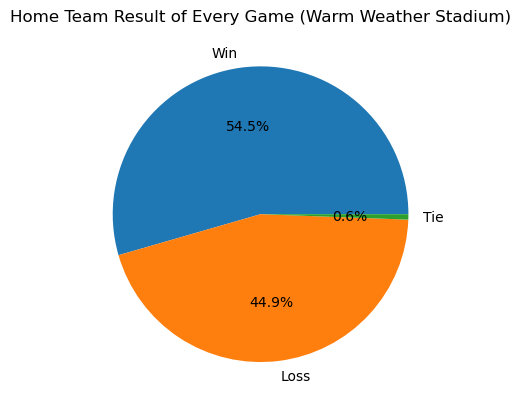

In [138]:
# Pie chart of total home wins and total losses/ties for "warm weather" stadiums


# Filter entire dataset for warm weather stadiums
warm_data=data_df.loc[data_df['stadium_weather_type']=='warm']

# Make small dataframe with total numbers of Wins or Losses/Ties from above dataframe
summary=pd.DataFrame(warm_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.pie(counts, labels=result, autopct='%1.1f%%')

plt.title("Home Team Result of Every Game (Warm Weather Stadium)")

plt.show()

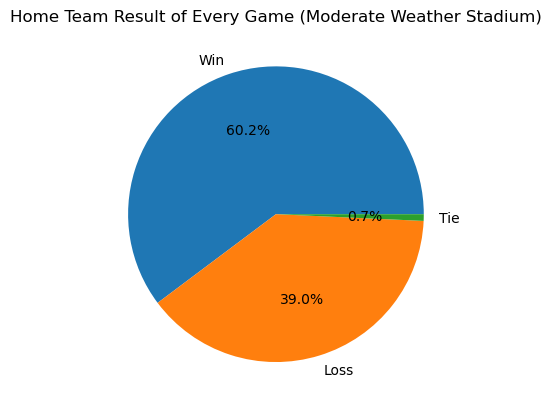

In [139]:
# Pie chart of total home wins and total losses/ties for "moderate weather" stadiums


# Filter entire dataset for warm weather stadiums
moderate_data=data_df.loc[data_df['stadium_weather_type']=='moderate']

# Make small dataframe with total numbers of Wins or Losses/Ties from above dataframe
summary=pd.DataFrame(moderate_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']

plt.pie(counts, labels=result, autopct='%1.1f%%')

plt.title("Home Team Result of Every Game (Moderate Weather Stadium)")

plt.show()

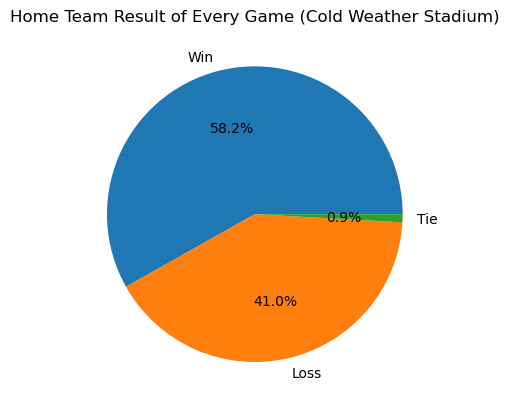

In [140]:
# Pie chart of total home wins and total losses/ties for "cold weather" stadiums


# Filter entire dataset for warm weather stadiums
cold_data=data_df.loc[data_df['stadium_weather_type']=='cold']

# Make small dataframe with total numbers of Wins or Losses/Ties from above dataframe
summary=pd.DataFrame(cold_data['home_result'].value_counts())


# From small dataframe, grab index and counts for bar graph
result=summary.index
counts=summary['count']


plt.pie(counts, labels=result, autopct='%1.1f%%')
plt.title("Home Team Result of Every Game (Cold Weather Stadium)")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

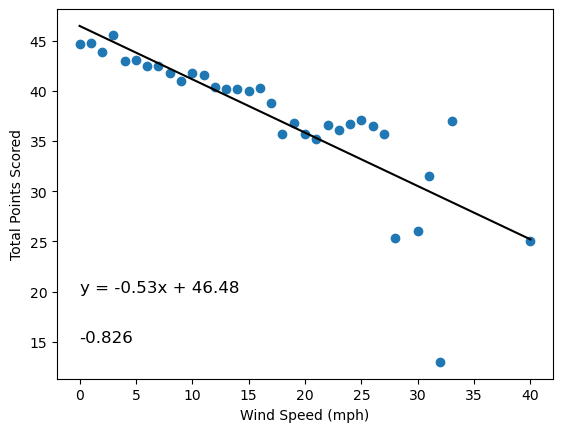

In [141]:
# Wind Speed vs Total Score

wind_data=data_df.dropna(subset=['weather_wind_mph'])
wind_data['total_score']=(wind_data['score_home']+wind_data['score_away'])
wind_data=pd.DataFrame(wind_data.groupby(['weather_wind_mph'])['total_score'].mean())
wind_data.head()

x_axis=wind_data.index
y_axis=wind_data['total_score']

plt.scatter(x_axis, y_axis)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Total Points Scored')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"black")
plt.annotate(line_eq,(0, 20), fontsize=12,color="black")
plt.annotate(round(rvalue,3),(0, 15), fontsize=12,color="black")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

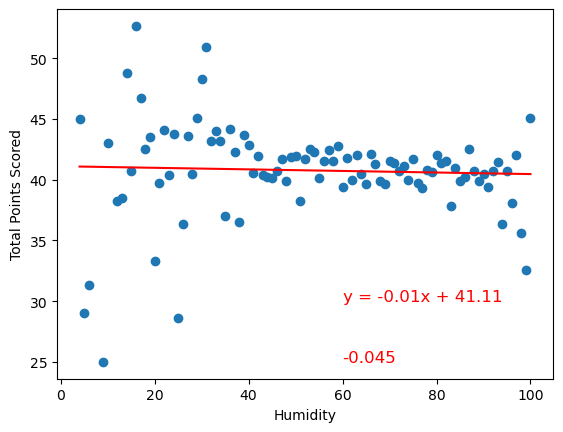

In [142]:
# Humidity vs Total Score

humid_data=data_df.dropna(subset=['weather_humidity'])
humid_data['total_score']=(humid_data['score_home']+humid_data['score_away'])
humid_data=pd.DataFrame(humid_data.groupby(['weather_humidity'])['total_score'].mean())


x_axis=humid_data.index
y_axis=humid_data['total_score']

plt.scatter(x_axis, y_axis)
plt.xlabel('Humidity')
plt.ylabel('Total Points Scored')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"red")
plt.annotate(line_eq,(60, 30), fontsize=12,color="red")
plt.annotate(round(rvalue,3),(60, 25), fontsize=12,color="red")

plt.show

In [143]:
# Bar graph of total score vs weather type (warm moderate cold)

data_df.dropna(subset=['stadium_weather_type'], inplace=True)
data_df['total_score']=(data_df['score_home']+data_df['score_away'])

warm_data=data_df.loc[data_df['stadium_weather_type']=='warm']
warm_data=warm_data['total_score'].mean()

mod_data=data_df.loc[data_df['stadium_weather_type']=='moderate']
mod_data=mod_data['total_score'].mean()


cold_data=data_df.loc[data_df['stadium_weather_type']=='cold']
cold_data=cold_data['total_score'].mean()

print(warm_data)
print(mod_data)
print(cold_data)



41.43586269196025
42.633625619519634
41.31266105480158


In [148]:
# Bar graph of total score vs indoor / outdooe

data_df.dropna(subset=['stadium_type'], inplace=True)
data_df['total_score']=(data_df['score_home']+data_df['score_away'])

indoor_data=data_df.loc[data_df['stadium_type']=='indoor']
indoor_data=indoor_data['total_score'].mean()

outdoor_data=data_df.loc[data_df['stadium_type']=='outdoor']
outdoor_data=outdoor_data['total_score'].mean()

print(outdoor_data)
print(indoor_data)


 

41.66335147307187
44.023820867079564


In [193]:
# Graph of win % vs year

# Get win, loss and tie counts when grouped by year

#counts=data_df.groupby(['schedule_season', 'home_result']).size()

#counts=data_df.groupby(['schedule_season'])

counts=data_df.groupby(['schedule_season']).agg({'home_result':'size'}).apply(lambda x: 100*x/x.sum())
                    
                    
                    
                    
                    


counts.head()


# Filter out everything except Wins
#win_data=data_df.loc[data_df['home_result']=='Win']

# Get win counts when grouped by year
#win_counts=pd.DataFrame(win_data.groupby(['schedule_season']).size())


# Plot graph of wins vs year

#x_axis=win_counts.index
#y_axis=win_counts[0]

#plt.xlabel('Season')
#plt.ylabel('Number of Wins')
#plt.scatter(x_axis, y_axis)
#plt.show

,home_result
schedule_season,
1966,1.210636
1967,1.292335
1968,1.336898
1969,1.396316
1970,1.396316
